# Titanic 생존예측

In [16]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# 실험실에서 기능 활성화
from sklearn.experimental import enable_iterative_imputer
# MICE (다른 특성으로 결측 대체하기)
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

titanic = sns.load_dataset('titanic')

features = ['pclass', 'sex', 'age', 'fare', 'embarked']
target = 'survived'

df = titanic[features + [target]]

# 수동 결측치 채우기 -> embarked (탑승항구) == 대부분이 'S' 
df['embarked'].fillna('S', inplace=True)

# One-Hot Encoding (OHE) -> 범주형 데이터를 T/F로 이루어진 여러개의 컬럼으로 변환
# Pros -> 숫자 0, 1, 2 는 크기 순서가 생겨 해석이 잘못될 수 있음
# Cons -> 카테고리가 많으면 차원이 늘어남
df = pd.get_dummies(df, columns=['sex', 'embarked'])

# encoder = OneHotEncoder(sparse_output=False, drop=None)
# df_encoded = pd.DataFrame(encoder.fit_transform(df[['sex', 'embarked']]), columns=df.columns)


# MICE 결측치가 있는 변수를 다른 변수들을 이용해 반복적으로 예측
imputer = IterativeImputer(
    max_iter=10,
    random_state=42
)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed.head()

,pclass,age,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3.0,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,7.9250,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,53.1000,1.0,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [17]:
X = df_imputed.drop('survived', axis=1)
y = df_imputed[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# KNN 분류

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
score_knn = knn.score(X_test_scaled, y_test)
print(f'KNN: {score_knn:.5f}')

KNN: 0.81564


# Logistic회귀 분류

In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
score_lr = lr.score(X_test_scaled, y_test)
print(f'Logistic Regression: {score_lr:.5f}')

Logistic Regression: 0.80447


# 결정트리 분류

In [20]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
score_dt = dt.score(X_test, y_test)
print(f'Descision Tree: {score_dt:.5f}')

Descision Tree: 0.83799


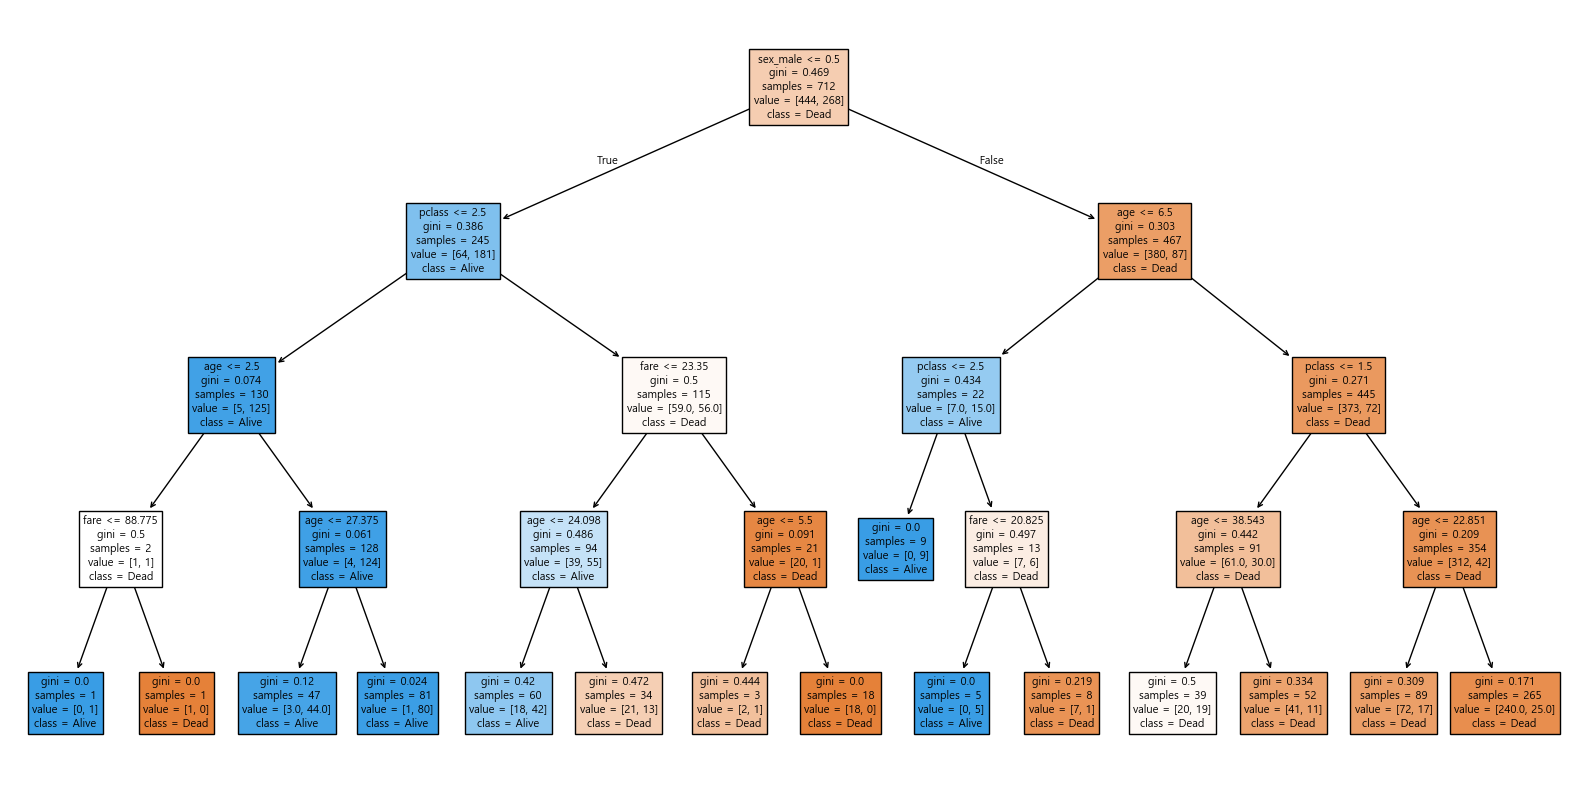

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Dead', 'Alive'], filled=True)
plt.show()

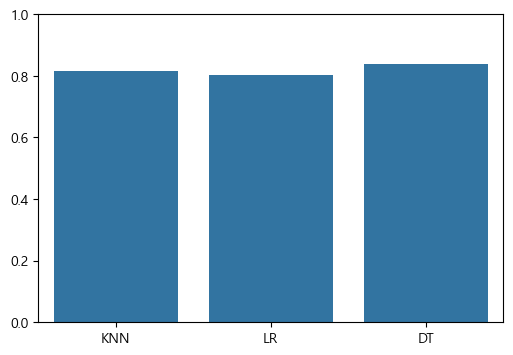

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(y=[score_knn, score_lr, score_dt], x=['KNN', 'LR', 'DT'])
plt.ylim(0, 1)
plt.show()